# Regression and Other Stories: Mile

Trend of record times in the mile run. See Chapter 3 in Regression and Other Stories.

----

## Load Packages

In [1]:
using DataFrames, StatsPlots, CSV, HTTP
using Distributions, Turing, MCMCChains

## Load data

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Mile/data/mile.csv"
mile = CSV.File(HTTP.get(data).body) |> DataFrame
first(mile, 6)

,yr,month,min,sec,year,seconds
,Int64,Float64,Int64,Float64,Float64,Float64
1,1913,5.0,4,14.4,1913.42,254.4
2,1915,7.0,4,12.6,1915.58,252.6
3,1923,8.0,4,10.4,1923.67,250.4
4,1931,10.0,4,9.2,1931.83,249.2
5,1933,7.0,4,7.6,1933.58,247.6
6,1934,6.0,4,6.8,1934.5,246.8


## Linear model

In [3]:
@model function m1(year, seconds)
    
    # sd
    σ ~ truncated(Normal(0,100), 0, Inf)
    
    # Linear
    α ~ Normal(500, 5000) # Must start at some initial value
    β ~ Normal(-1, 10) # time getting better as years pass
    
    μ = α .+ year * β
    seconds ~ MvNormal(μ, σ)
end;

In [4]:
model = m1(mile.year, mile.seconds)
chains = sample(model, NUTS(0.50), 5000)
summarystats(chains)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)

Summary Statistics
  parameters        mean       std   naive_se      mcse       ess      rhat 
      Symbol     Float64   Float64    Float64   Float64   Float64   Float64 

           α   1011.8246   13.7498     0.1945    1.4041   27.8194    1.0645
           β     -0.3956    0.0070     0.0001    0.0007   27.7676    1.0647
           σ      1.3984    0.1518     0.0021    0.0203   11.4314    1.5775


## Predictions for 1900 and 2000

[Original code](https://avehtari.github.io/ROS-Examples/Mile/mile.html) has values hardcoded in (slope = 0.393, intercept = 1007)

In [5]:
println(round.(1007 .- 0.393 .* [1900, 2000],digits=1))

[260.3, 221.0]


In [6]:
println(round.(mean(chains[:α].data) .+ mean(chains[:β].data) .* [1900,2000], digits=1))

[260.2, 220.7]


## Example of an increasing trend

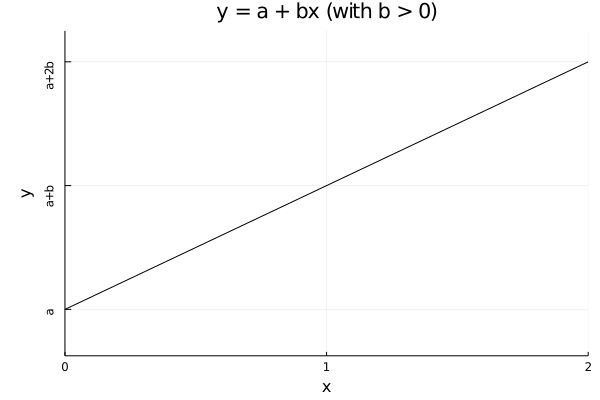

In [7]:
a = 0.15
b = 0.4

x = 0:2
y = a .+ b * x

plot(
    x,y,
    ylabel="y", xlabel="x",
    title="y = a + bx (with b > 0)",
    legend=false,
    color=:black,
    ylim=(0, last(y)+0.1), xlim=(0,2),
    xticks=0:2, yticks=(y, ["a","a+b","a+2b"]), yrotation=90
)

## Example of a decreasing trend

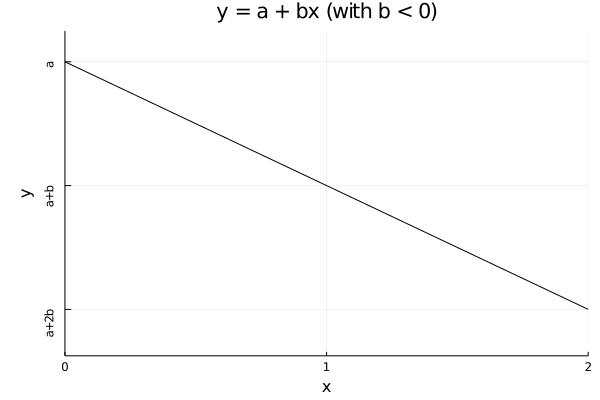

In [8]:
a = 0.95
b = -0.4

x = 0:2
y = a .+ b * x

plot(
    x,y,
    ylabel="y", xlabel="x",
    title="y = a + bx (with b < 0)",
    legend=false,
    color=:black,
    ylim=(0, first(y)+0.1), xlim=(0,2),
    xticks=0:2, yticks=(y, ["a","a+b","a+2b"]), yrotation=90
)

## Approximate trend from the fit in range [0,2.1]

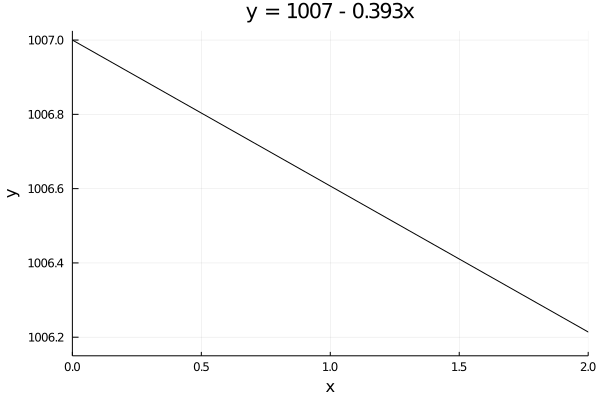

In [9]:
plot(
    0:0.1:2.1,
    x->1007 - 0.393 * x,
    ylabel="y", xlabel="x",
    title="y = 1007 - 0.393x",
    legend=false,
    color=:black,
    xlim=(0,2)
)

## Approximate trend from the fit in range [0, 100]

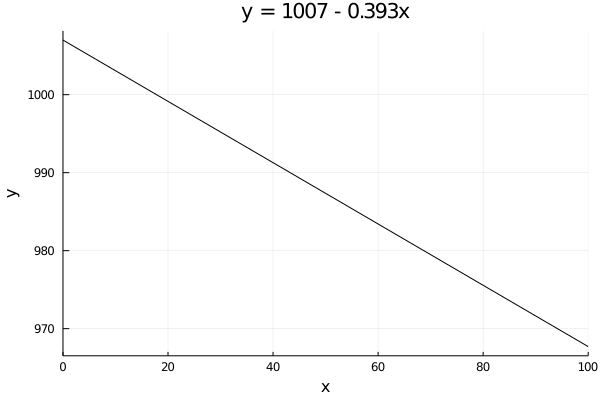

In [10]:
plot(
    0:1:100,
    x->1007 - 0.393 * x,
    ylabel="y", xlabel="x",
    title="y = 1007 - 0.393x",
    legend=false,
    color=:black,
    xlim=(0,100)
)

## Approximate trend of record times in the mile run from 1900 to 2000

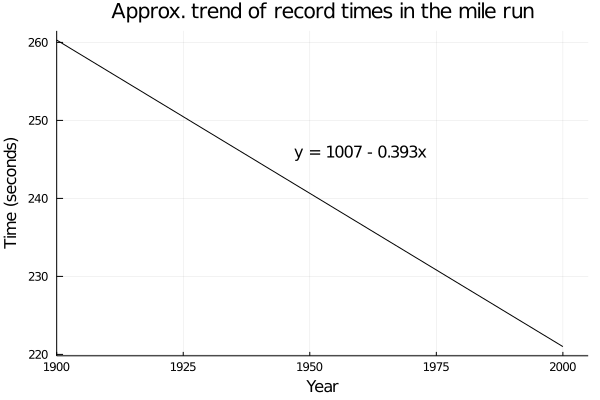

In [11]:
plot(
    1900:1:2000,
    x->1007 - 0.393 * x,
    ylabel="Time (seconds)", xlabel="Year",
    title="Approx. trend of record times in the mile run",
    legend=false,
    color=:black,
    xlim=(1900,2005)
)
annotate!(1960, 246, text("y = 1007 - 0.393x", 11))

## Plot with data

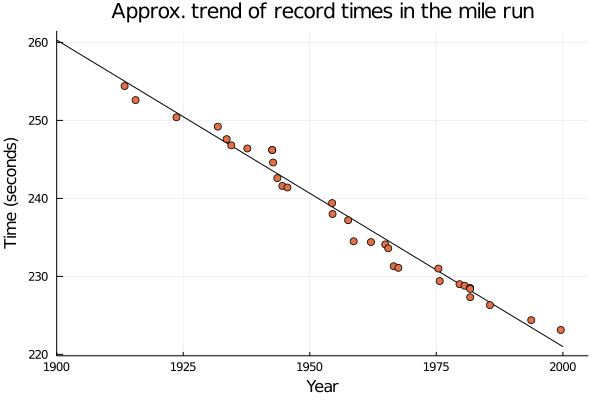

In [12]:
plot(
    1900:1:2000,
    x->1007 - 0.393 * x,
    ylabel="Time (seconds)", xlabel="Year",
    title="Approx. trend of record times in the mile run",
    legend=false,
    color=:black,
    xlim=(1900,2005)
)
scatter!(mile.year, mile.seconds)